In [252]:
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import numpy as np
import functools as ft
from datetime import datetime

todayDate = datetime.today().strftime('%Y_%m_%d')
pd.set_option('display.max_columns', 40)

In [253]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5}
plt.rcParams.update(settings)

In [254]:
###################################
# https://cbsodata.readthedocs.io/en/latest/readme_link.html

# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cpb.nl/sites/default/files/publicaties/download/cpb-technical-background-document-bvar-models-used-cpb.pdf
###################################

#### GDP
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84105NED/table?ts=1706684088769
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84087NED/table?ts=1696490590802
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/85879NED/table?ts=1696490590802

In [255]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\1879455058.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')
C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\1879455058.py:241: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  all_data.index = pd.date_range(start=start_date, periods = all_data.shape[0], freq="Q").to_period('Q')


(119, 207)


C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\1879455058.py:257: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(figures + "NLD_basic_macro_data.png")
C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\1879455058.py:257: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(figures + "NLD_basic_macro_data.png")
c:\Users\jpark\vscode\NowCast_Data_v2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


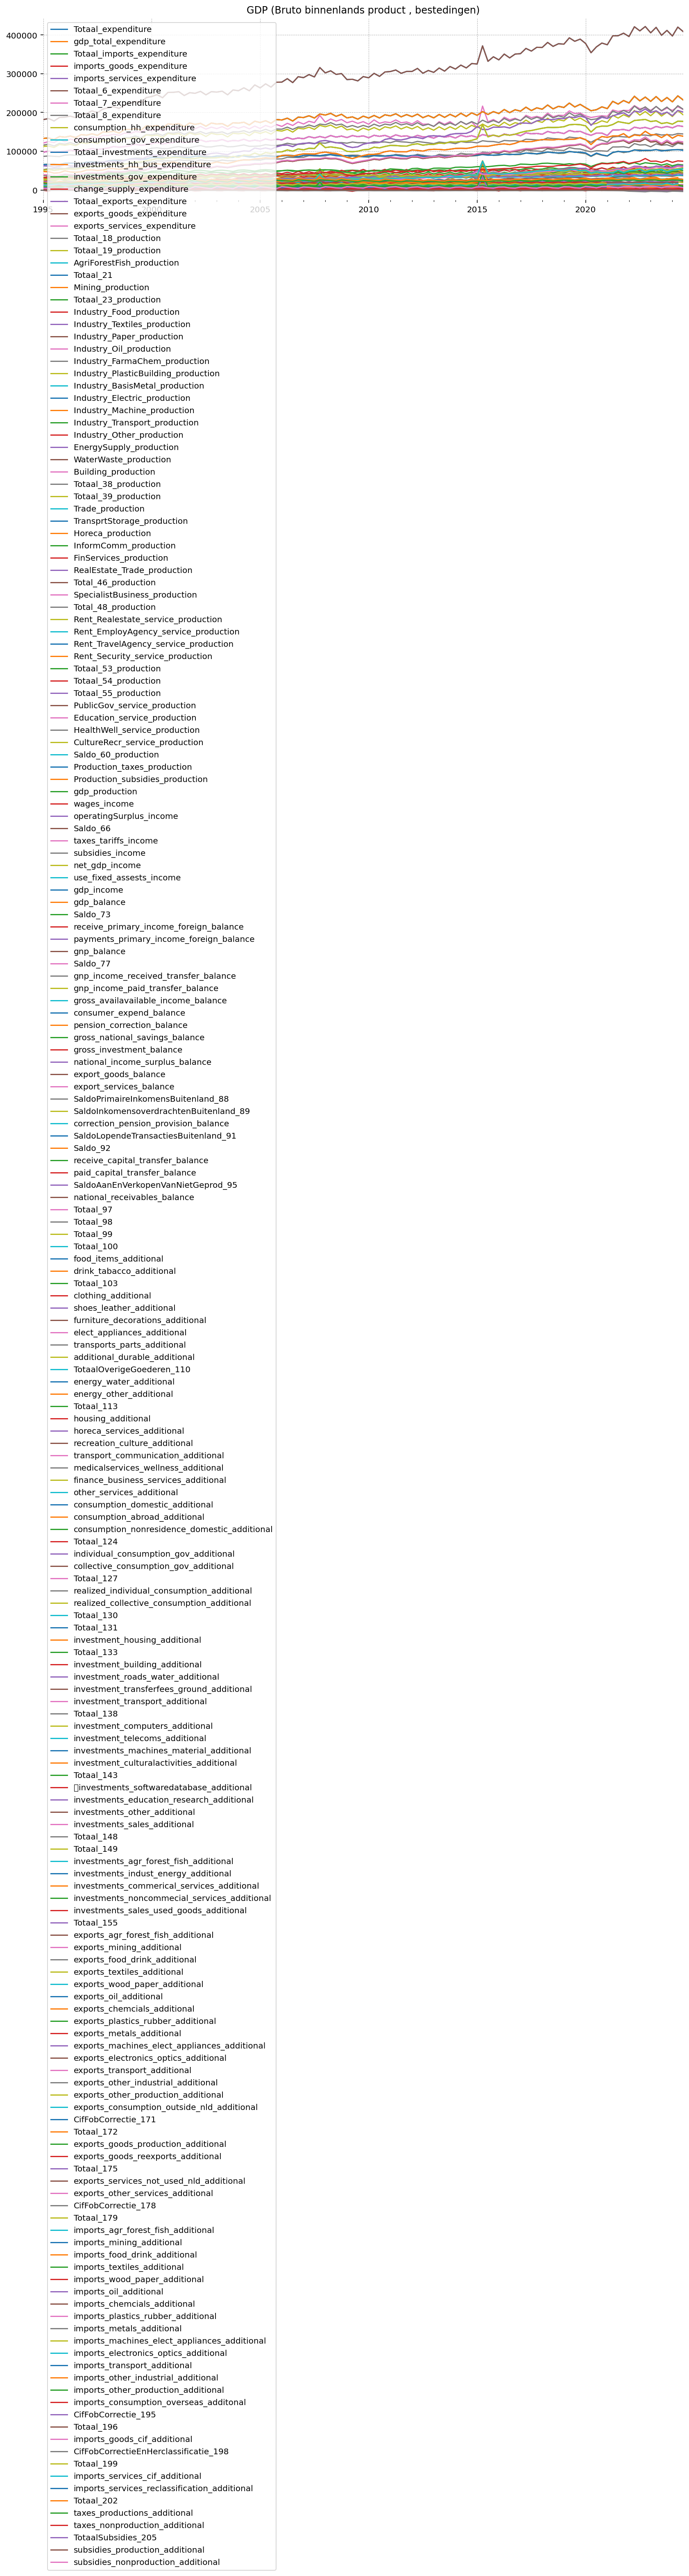

In [287]:
def macro_data_cbs(identifier, verbose = False):
    start_date = '01/01/1995'

    if verbose:
        info = cbsodata.get_info(identifier)
        print(info)
        tables = pd.DataFrame(cbsodata.get_table_list())

    # get data
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        data.to_csv(output + "unprocessed_data.csv")
        print(data.Perioden)

    data = data[data["SoortGegevens"] == 'Prijsniveau 2021']
    data = data[data['Perioden'].str.contains('kwartaal')]
    data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')

    all_data = data
    # remove ID column
    all_data.drop(columns = ['ID','SoortGegevens','Perioden'], inplace = True)
    # remove Totaal columns
    #all_data = all_data.loc[:, ~all_data.columns.str.contains('Totaal')]
    # remove Saldo columns
    #all_data = all_data.loc[:, ~all_data.columns.str.contains('Saldo')]
    # remove CifFobCorrectie columns
    #all_data = all_data.loc[:, ~all_data.columns.str.contains('CifFobCorrectie')]


    all_data.rename(columns = {
        'Totaal_1': 'Totaal_expenditure',
        'BrutoBinnenlandsProduct_2': 'gdp_total_expenditure', 
        'Totaal_3': 'Totaal_imports_expenditure',
        'Goederen_4': 'imports_goods_expenditure',
        'Diensten_5': 'imports_services_expenditure',
        'Totaal_6': 'Totaal_6_expenditure',
        'Totaal_7': 'Totaal_7_expenditure',
        'Totaal_8': 'Totaal_8_expenditure',
        'Huishoudens_9': 'consumption_hh_expenditure',
        'Overheid_10': 'consumption_gov_expenditure',
        'Totaal_11': 'Totaal_investments_expenditure',
        'BedrijvenEnHuishoudens_12': 'investments_hh_bus_expenditure',
        'Overheid_13': 'investments_gov_expenditure',
        'VeranderingInVoorraden_14': 'change_supply_expenditure',
        'Totaal_15': 'Totaal_exports_expenditure',
        'Goederen_16': 'exports_goods_expenditure',
        'Diensten_17': 'exports_services_expenditure',
        'Totaal_18': 'Totaal_18_production',
        'Totaal_19': 'Totaal_19_production',
        'ALandbouwBosbouwEnVisserij_20':	'AgriForestFish_production',
        'BDelfstoffenwinning_22':	'Mining_production',
        'Totaal_23': 'Totaal_23_production',
        'k_1012VoedingsGenotmiddelenindustrie_24':	'Industry_Food_production',
        'k_1315TextielKledingLederindustrie_25':	'Industry_Textiles_production',
        'k_1618HoutPapierGrafischeIndustr_26':	'Industry_Paper_production',
        'k_19AardolieIndustrie_27':	'Industry_Oil_production',
        'k_2021ChemieEnFarmaceutischeIndustrie_28':	'Industry_FarmaChem_production',
        'k_2223KunststofEnBouwmateriaalindustr_29':	'Industry_PlasticBuilding_production',
        'k_2425BasismetaalMetaalprodIndustrie_30':	'Industry_BasisMetal_production',
        'k_2627ElektrischeEnElektronIndustrie_31':	'Industry_Electric_production',
        'k_28MachineIndustrie_32':	'Industry_Machine_production',
        'k_2930Transportmiddelenindustrie_33':	'Industry_Transport_production',
        'k_3133OverigeIndustrieEnReparatie_34':	'Industry_Other_production',
        'DEnergievoorziening_35':	'EnergySupply_production',
        'EWaterbedrijvenEnAfvalbeheer_36':	'WaterWaste_production',
        'FBouwnijverheid_37':	'Building_production',
        'Totaal_38': 'Totaal_38_production',
        'Totaal_39': 'Totaal_39_production',
        'GHandel_40':	'Trade_production',
        'HVervoerEnOpslag_41':	'TransprtStorage_production',
        'IHoreca_42':	'Horeca_production',
        'JInformatieEnCommunicatie_43':	'InformComm_production',
        'KFinancieleDienstverlening_44':	'FinServices_production',
        'LVerhuurEnHandelVanOnroerendGoed_45':	'RealEstate_Trade_production',
        'Totaal_46': 'Total_46_production',
        'MSpecialistischeZakelijkeDiensten_47':	'SpecialistBusiness_production',
        'Totaal_48': 'Total_48_production',
        'k_77VerhuurVanRoerendeGoederen_49':	'Rent_Realestate_service_production',
        'k_78UitzendbureausEnArbeidsbemiddeling_50':	'Rent_EmployAgency_service_production',
        'k_79ReisbureausReisorganisatieEnInfo_51':	'Rent_TravelAgency_service_production',
        'k_8082BeveiligingEnOverigeDiensten_52':	'Rent_Security_service_production',
        'Totaal_53': 'Totaal_53_production',
        'Totaal_54': 'Totaal_54_production',
        'Totaal_55': 'Totaal_55_production',
        'OOpenbaarBestuurEnOverheidsdiensten_56':	'PublicGov_service_production',
        'POnderwijs_57':	'Education_service_production',
        'QGezondheidsEnWelzijnszorg_58':	'HealthWell_service_production',
        'RUCultuurRecreatieOverigeDiensten_59':	'CultureRecr_service_production',
        'Saldo_60': 'Saldo_60_production',
        'ProductgebondenBelastingen_61':	'Production_taxes_production',
        'ProductgebondenSubsidies_62':	'Production_subsidies_production',
        'BrutoBinnenlandsProduct_63':	'gdp_production',
        'BeloningVanWerknemers_64':	'wages_income',
        'NettoExploitatieoverschot_65':	'operatingSurplus_income',
        'Saldo_66': 'Saldo_66',
        'BelastingenOpProductieEnInvoer_67':	'taxes_tariffs_income',
        'Subsidies_68':	'subsidies_income',
        'NettoBinnenlandsProduct_69':	'net_gdp_income',
        'VerbruikVanVasteActiva_70':	'use_fixed_assests_income',
        'BrutoBinnenlandsProduct_71':	'gdp_income',
        'BrutoBinnenlandsProduct_72':	'gdp_balance',
        'Saldo_73': 'Saldo_73',
        'OntvangenPrimaireInkomensBuitenland_74':	'receive_primary_income_foreign_balance',
        'BetaaldePrimaireInkomensBuitenland_75':	'payments_primary_income_foreign_balance',
        'BrutoNationaalInkomen_76':	'gnp_balance',
        'Saldo_77': 'Saldo_77',
        'OntvangenInkomensoverdrachtBuitenland_78':	'gnp_income_received_transfer_balance',
        'BetaaldeInkomensoverdrachtenBuitenland_79':	'gnp_income_paid_transfer_balance',
        'BrutoBeschikbaarNationaalInkomen_80':	'gross_availavailable_income_balance',
        'ConsumptieveBestedingen_81':	'consumer_expend_balance',
        'CorrectiePensioenvoorziening_82':	'pension_correction_balance',
        'BrutoNationaleBesparingen_83':	'gross_national_savings_balance',
        'BrutoInvesteringen_84':	'gross_investment_balance',
        'NationaalInkomensoverschot_85':	'national_income_surplus_balance',
        'UitvoersaldoGoederen_86':	'export_goods_balance',
        'UitvoersaldoDiensten_87':	'export_services_balance',
        'SaldoPrimaireInkomensBuitenland_88': 'SaldoPrimaireInkomensBuitenland_88',
        'SaldoPrimaireInkomensBuitenland_89': 'SaldoPrimaireInkomensBuitenland_89',
        'CorrectiePensioenvoorziening_90':	'correction_pension_provision_balance',
        'SaldoLopendeTransactiesBuitenland_91': 'SaldoLopendeTransactiesBuitenland_91',
        'Saldo_92': 'Saldo_92',
        'OntvangenKapitaaloverdrachten_93':	'receive_capital_transfer_balance',
        'BetaaldeKapitaaloverdrachten_94':	'paid_capital_transfer_balance',
        'SaldoAanEnVerkopenVanNietGeprod_95': 'SaldoAanEnVerkopenVanNietGeprod_95',
        'NationaalVorderingensaldo_96':	'national_receivables_balance',
        'Totaal_97': 'Totaal_97',
        'Totaal_98': 'Totaal_98',
        'Totaal_99': 'Totaal_99',
        'Totaal_100': 'Totaal_100',
        'Voedingsmiddelen_101':	'food_items_additional',
        'DrankenEnTabak_102':	'drink_tabacco_additional',
        'Totaal_103': 'Totaal_103',
        'KledingEnTextiel_104':	'clothing_additional',
        'SchoenenEnLederwaren_105':	'shoes_leather_additional',
        'WoninginrichtingEnWoningdecoratie_106':	'furniture_decorations_additional',
        'ElektrischeApparatuur_107':	'elect_appliances_additional',
        'VervoermiddelenEnOnderdelen_108':	'transports_parts_additional',
        'OverigeDuurzameGoederen_109':	'additional_durable_additional',
        'TotaalOverigeGoederen_110': 'TotaalOverigeGoederen_110',
        'EnergieEnWater_111':	'energy_water_additional',
        'BrandstoffenEnOverigeGoederen_112':	'energy_other_additional',
        'Totaal_113': 'Totaal_113',
        'Huisvesting_114':	'housing_additional',
        'Horecadiensten_115':	'horeca_services_additional',
        'RecreatieEnCultuurdiensten_116':	'recreation_culture_additional',
        'VervoerEnCommunicatieDiensten_117':	'transport_communication_additional',
        'MedischeDienstenEnWelzijnszorg_118':	'medicalservices_wellness_additional',
        'FinancieleEnZakelijkeDiensten_119':	'finance_business_services_additional',
        'OverigeDiensten_120':	'other_services_additional',
        'BinnenlandsConsumptieHuishoudens_121':	'consumption_domestic_additional',
        'ConsumptieIngezetenenInHetBuitenland_122':	'consumption_abroad_additional',
        'ConsumptieNietIngezetenenInNederland_123':	'consumption_nonresidence_domestic_additional',
        'Totaal_124': 'Totaal_124',
        'IndividueleConsumptieOverheid_125':	'individual_consumption_gov_additional',
        'CollectieveConsumptieOverheid_126':	'collective_consumption_gov_additional',
        'Totaal_127': 'Totaal_127',
        'WerkelijkeIndividueleConsumptie_128':	'realized_individual_consumption_additional',
        'WerkelijkeCollectieveConsumptie_129':	'realized_collective_consumption_additional',
        'Totaal_130': 'Totaal_130',
        'Totaal_131': 'Totaal_131',
        'Woningen_132':	'investment_housing_additional',
        'Totaal_133': 'Totaal_133',
        'Gebouwen_134':	'investment_building_additional',
        'GrondWegEnWaterbouwkundigeWerken_135':	'investment_roads_water_additional',
        'OverdrachtskostenOpGrond_136':	'investment_transferfees_ground_additional',
        'Vervoermiddelen_137':	'investment_transport_additional',
        'Totaal_138': 'Totaal_138',
        'Computers_139':	'investment_computers_additional',
        'Telecommunicatieapparatuur_140':	'investment_telecoms_additional',
        'MachinesEnOverigeMaterieleActiva_141':	'investments_machines_material_additional',
        'InCultuurGebrachteActiva_142':	'investment_culturalactivities_additional',
        'Totaal_143': 'Totaal_143',
        'ComputerprogrammatuurEnDatabanken_144':'	investments_softwaredatabase_additional',
        'OnderzoekEnOntwikkeling_145':	'investments_education_research_additional',
        'OverigeImmaterieleActiva_146':	'investments_other_additional',
        'VerkoopVanGebruikteVasteActiva_147':	'investments_sales_additional',
        'Totaal_148': 'Totaal_148',
        'Totaal_149': 'Totaal_149',
        'ALandbouwBosbouwEnVisserij_150':	'investments_agr_forest_fish_additional',
        'BFNijverheidEnEnergie_151':	'investments_indust_energy_additional',
        'GNCommercieleDienstverlening_152':	'investments_commerical_services_additional',
        'OUNietCommercieleDienstverlening_153':	'investments_noncommecial_services_additional',
        'VerkoopVanGebruikteVasteActiva_154':	'investments_sales_used_goods_additional',
        'Totaal_155': 'Totaal_155',
        'LandbouwBosbouwEnVisserijproducten_156':	'exports_agr_forest_fish_additional',
        'WinningVanDelfstoffen_157':	'exports_mining_additional',
        'VoedingsmiddelenDrankenEnTabak_158':	'exports_food_drink_additional',
        'TextielKledingEnProductenVanLeder_159':	'exports_textiles_additional',
        'HoutEnPapierwarenDrukwerk_160':	'exports_wood_paper_additional',
        'Aardolieproducten_161':	'exports_oil_additional',
        'ChemischeEnFarmaceutischeProducten_162':	'exports_chemcials_additional',
        'RubberKunststofEnMineraleProducten_163':	'exports_plastics_rubber_additional',
        'BasismetalenEnMetaalproducten_164':	'exports_metals_additional',
        'MachinesEnElektrischeApparatuur_165':	'exports_machines_elect_appliances_additional',
        'ElektrotechnischeEnOptischeApparatuur_166':	'exports_electronics_optics_additional',
        'Transportmiddelen_167':	'exports_transport_additional',
        'OverigeIndustrieleProducten_168':	'exports_other_industrial_additional',
        'OverigeProducten_169':	'exports_other_production_additional',
        'ConsumptieNietIngezetenenInNederland_170':	'exports_consumption_outside_nld_additional',
        'CifFobCorrectie_171': 'CifFobCorrectie_171',
        'Totaal_172': 'Totaal_172',
        'UitvoerGoederenUitProductie_173':	'exports_goods_production_additional',
        'Wederuitvoer_174':	'exports_goods_reexports_additional',
        'Totaal_175': 'Totaal_175',
        'ConsumptieNietIngezetenenInNederland_176':	'exports_services_not_used_nld_additional',
        'OverigeUitvoerVanDiensten_177':	'exports_other_services_additional',
        'CifFobCorrectie_178': 'CifFobCorrectie_178',
        'Totaal_179': 'Totaal_179',
        'LandbouwBosbouwEnVisserijproducten_180':	'imports_agr_forest_fish_additional',
        'WinningVanDelfstoffen_181':	'imports_mining_additional',
        'VoedingsmiddelenDrankenEnTabak_182':	'imports_food_drink_additional',
        'TextielKledingEnProductenVanLeder_183':	'imports_textiles_additional',
        'HoutEnPapierwarenDrukwerk_184':	'imports_wood_paper_additional',
        'Aardolieproducten_185':	'imports_oil_additional',
        'ChemischeEnFarmaceutischeProducten_186':	'imports_chemcials_additional',
        'RubberKunststofEnMineraleProducten_187':	'imports_plastics_rubber_additional',
        'BasismetalenEnMetaalproducten_188':	'imports_metals_additional',
        'MachinesEnElektrischeApparatuur_189':	'imports_machines_elect_appliances_additional',
        'ElektrotechnischeEnOptischeApparaten_190':	'imports_electronics_optics_additional',
        'Transportmiddelen_191':	'imports_transport_additional',
        'OverigeIndustrieleProducten_192':	'imports_other_industrial_additional',
        'OverigeProducten_193':	'imports_other_production_additional',
        'ConsumptieIngezetenenInHetBuitenland_194':	'imports_consumption_overseas_additonal',
        'CifFobCorrectie_195': 'CifFobCorrectie_195',
        'Totaal_196': 'Totaal_196',
        'InvoerGoederenCif_197':	'imports_goods_cif_additional',
        'CifFobCorrectieEnHerclassificatie_198': 'CifFobCorrectieEnHerclassificatie_198',
        'Totaal_199': 'Totaal_199',
        'InvoerDienstenCif_200':	'imports_services_cif_additional',
        'CifFobHerclassificatie_201':	'imports_services_reclassification_additional',
        'Totaal_202': 'Totaal_202',
        'ProductgebondenBelastingen_203':	'taxes_productions_additional',
        'NietProductgebondenBelastingen_204':	'taxes_nonproduction_additional',
        'ProductgebondenSubsidies_206':	'subsidies_production_additional',
        'NietProductgebondenSubsidies_207':	'subsidies_nonproduction_additional'}, inplace = True)

    ######################
    # Set data index
    ######################
    all_data.index = pd.date_range(start=start_date, periods = all_data.shape[0], freq="Q").to_period('Q')
    # this adds one day, so that we can go to the first of a month
    all_data.index = pd.PeriodIndex(all_data.index, freq='Q').to_timestamp() #+ datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    print(all_data.shape)

    all_data.to_csv("tmp2.csv")

    return all_data


NLD_basic_macro_data = macro_data_cbs(identifier = '85879NED', verbose = False)
NLD_basic_macro_data.to_csv(output + "cbs_basic_macro_NOT_SEASONCORRECTED_qt.csv")

NLD_basic_macro_data.plot()
plt.title('GDP (Bruto binnenlands product , bestedingen)')
plt.savefig(figures + "NLD_basic_macro_data.png")
plt.show()


### Consumpiton Side

In [257]:
# compare both sides of consumption vs production

selectThese = [col for col in NLD_basic_macro_data.columns if '_expenditure' in col]
dt1 = NLD_basic_macro_data[selectThese]

removeThese = [col for col in dt1.columns if 'Totaal' not in col]
dt1 = dt1[removeThese]

gdp_expenditure = dt1.pop('gdp_total_expenditure')

#GDP = C + I + G + (X-M)

dt1.loc[:,'imports_goods_expenditure'] = -dt1['imports_goods_expenditure']
dt1.loc[:,'imports_services_expenditure'] = -dt1['imports_services_expenditure']

component_totals_exp = dt1.sum(axis = 1)
pd.concat([gdp_expenditure, component_totals_exp], axis = 1)


,gdp_total_expenditure,0
1995-01-01,133228.0,132733.0
1995-04-01,134022.0,134566.0
1995-07-01,130344.0,130823.0
1995-10-01,137998.0,138527.0
1996-01-01,136390.0,135990.0
...,...,...
2023-07-01,228414.0,227892.0
2023-10-01,238600.0,238464.0
2024-01-01,227490.0,227372.0
2024-04-01,242922.0,242810.0


### Production Side

In [289]:
selectThese = [col for col in NLD_basic_macro_data.columns if '_production' in col]
dt1 = NLD_basic_macro_data[selectThese]

dropThese = [col for col in dt1.columns if '_additional' not in col]
dt1 = dt1[dropThese]

dt4 = dt1.loc['1995-01-01',:]
dt4.to_csv("tmpdt4.csv")

dt4[['Totaal_19_production', 'Totaal_38_production', 'Totaal_53_production', 'Saldo_60_production']].sum()

133796.0

In [ ]:


dropThese = ['Totaal_18_production', 'Totaal_19_production',
             'Totaal_23_production', 'Totaal_38_production',
             'Totaal_39_production',  'Total_48_production',
             'Totaal_53_production', 'Totaal_54_production', 'gdp_production',
             'SpecialistBusiness_production',
             'Rent_Realestate_service_production',
             'Rent_EmployAgency_service_production',
             'Rent_TravelAgency_service_production']
             
dt2 = dt1.drop(columns = dropThese)


dt3 = dt2.loc['1995-01-01', :]
dt3

In [ ]:

dt3.to_csv("tmp300.csv")

dt3.sum() -18000 
             

In [ ]:


gdp_expenditure = dt1.pop('gdp_total_expenditure')

dt3 = dt1.iloc[::16, :]
dt3['Date'] = dt3.index
dt3.index = pd.to_datetime(dt3['Date']).dt.to_period(freq="D")

dt3.drop(columns = 'Date', inplace = True)
percentages = dt3.div(dt3.sum(axis=1), axis=0)
percentages.plot(kind='bar', stacked=True,title='Expenditures, but including imports')
plt.show()

C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\3709813048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt3['Date'] = dt3.index
C:\Users\jpark\AppData\Local\Temp\ipykernel_6968\3709813048.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt3.drop(columns = 'Date', inplace = True)


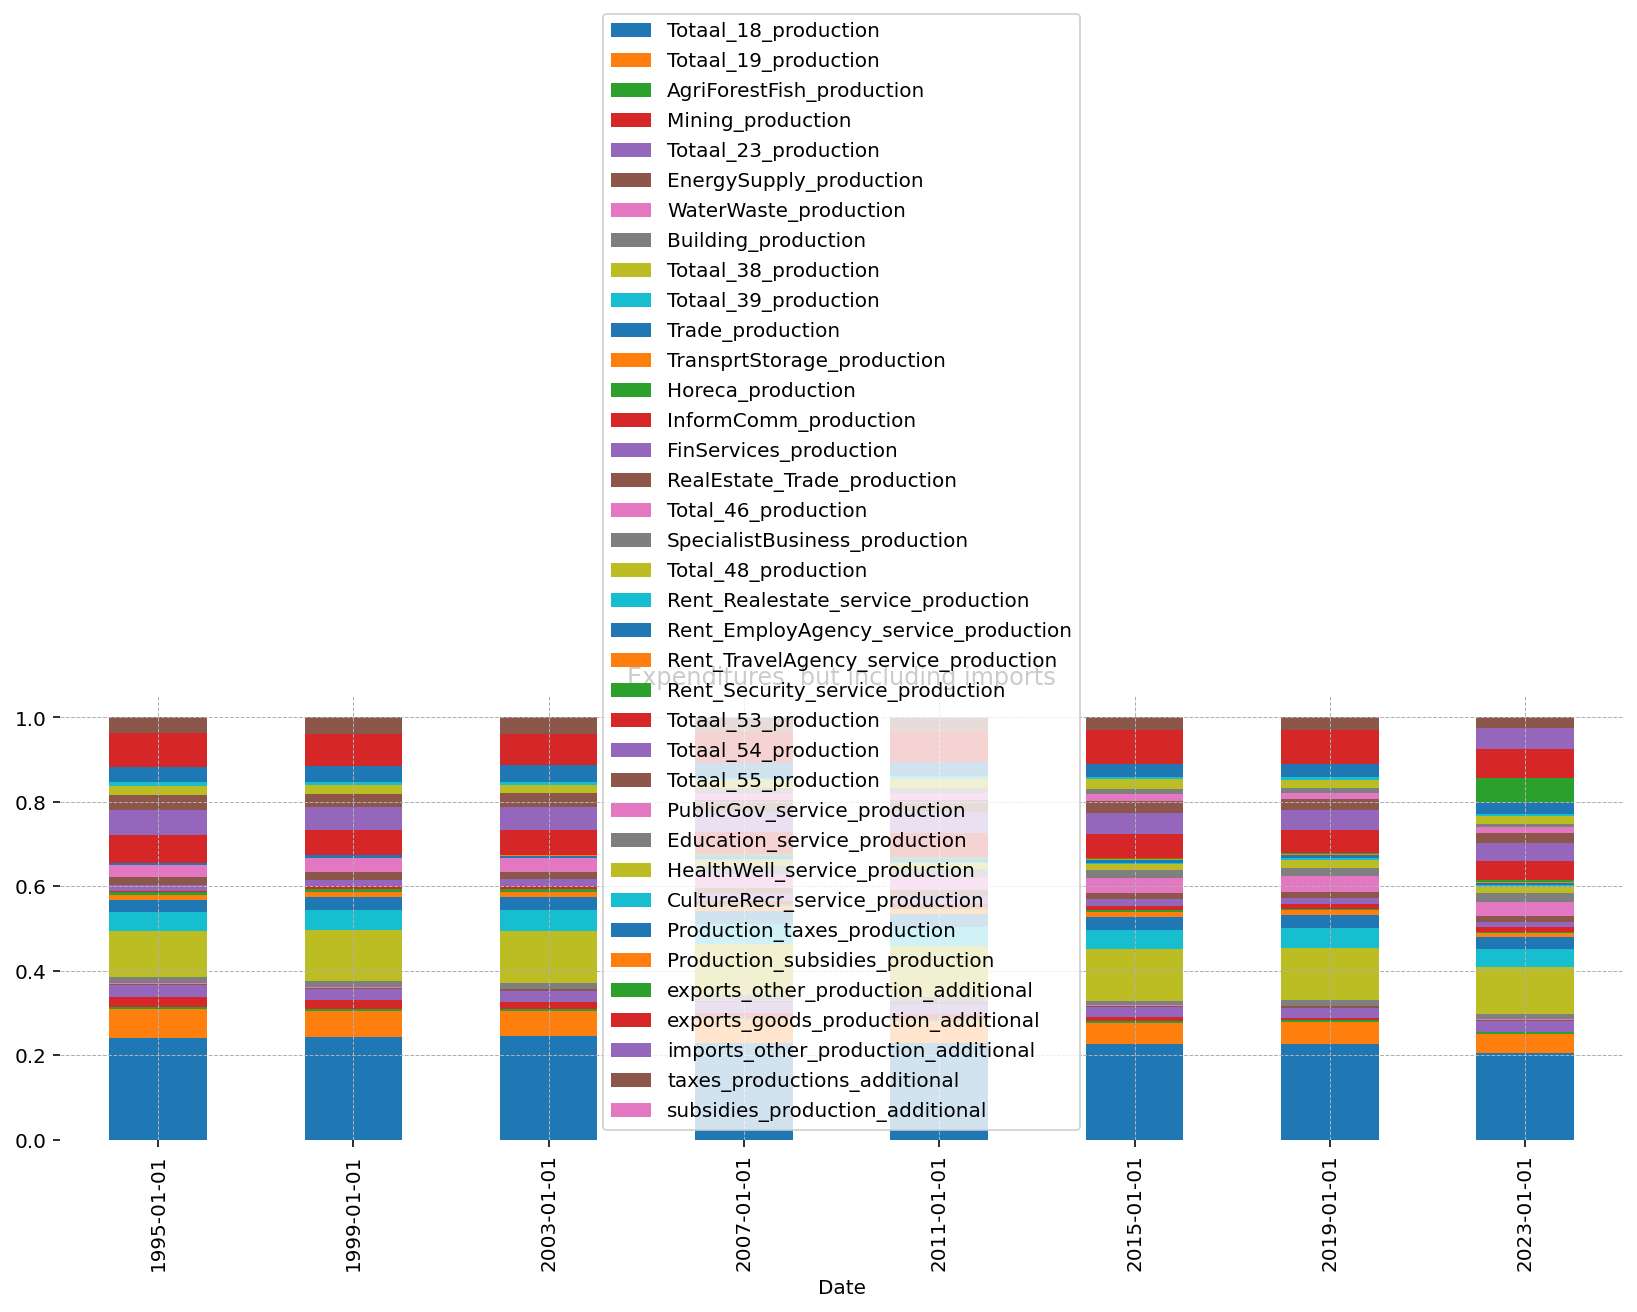

In [259]:
# Production side
selectThese = [col for col in NLD_basic_macro_data.columns if '_production' in col]
dt1 = NLD_basic_macro_data[selectThese]

removeThese = [col for col in dt1.columns if 'Industry_' not in col]
dt1 = dt1[removeThese]

gdp_expenditure = dt1.pop('gdp_production')

dt3 = dt1.iloc[::16, :]
dt3['Date'] = dt3.index
dt3.index = pd.to_datetime(dt3['Date']).dt.to_period(freq="D")

dt3.drop(columns = 'Date', inplace = True)
percentages = dt3.div(dt3.sum(axis=1), axis=0)
percentages.plot(kind='bar', stacked=True,title='Expenditures, but including imports')
plt.show()
